# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [49]:
import os
import glob
import pickle
import random
import numpy as np
import argparse

import cv2
import pandas as pd
from sklearn.utils import shuffle
from scipy.ndimage import imread
from scipy.misc import imresize, imsave

import tensorflow as tf

# TODO: Fill this in based on where you saved the training and testing data

# Data was downloaded from this source: 
# https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip
#@todo: implement a method to download this automatically if not present and remove raw data from source control

def load_data():
    """Load training, validation and test data
    """
    training_file = 'data/train.p'
    validation_file= 'data/valid.p'
    testing_file = 'data/test.p'
    with open(training_file, mode='rb') as f:
        train = pickle.load(f)
    with open(validation_file, mode='rb') as f:
        valid = pickle.load(f)
    with open(testing_file, mode='rb') as f:
        test = pickle.load(f)
    X_train = train['features']
    y_train = train['labels']
    X_valid = valid['features']
    y_valid = valid['labels']
    X_test = test['features']
    y_test = test['labels']
    return X_train, y_train, X_valid, y_valid, X_test, y_test

X_train, y_train, X_valid, y_valid, X_test, y_test = load_data()


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
def load_signnames():
    """Load the id to string name mapping into a dict.
    """
    id2names={}
    with open('signnames.csv') as f:
        d = f.readlines()
    for r in d[1:]:
        class_id, sign_name = r.strip().split(',')
        id2names[int(class_id)] = sign_name
    return id2names

def print_stats(X_train, y_train):
    """Print some basic stats obtained from the raw data.
    """
    n_train = X_train.shape[0]
    n_valid= X_valid.shape[0]
    n_test = X_test.shape[0]

    shapes = set([i.shape for i in X_train])
    assert len(shapes) == 1, 'Not all images have the same shape in the training data'
    image_shape = shapes.pop()

    n_classes = len(set(y_train))
    assert len(y_train) == len(X_train), 'Number of classes (y) must equal number of rows in input (X)'

# TODO: Number of training examples
    print("Number of training examples is: {}".format(n_train))

# TODO: Number of validation examples
    print("Number of validation examples is: {}".format(n_valid))

# TODO: Number of testing examples.
    print("Number of testing examples is: {}".format(n_test))

# TODO: What's the shape of an traffic sign image?
    print("Image data shape is: {}".format(image_shape))

# TODO: How many unique classes/labels there are in the dataset.
    print("Number of unique classes is: {}".format(n_classes))

    
    # Print a summary of the classes in y and their occurrence counts
    id2names = load_signnames()
    classes_wkeys = pd.Series([(i, id2names[i]) for i in y_train])
    print()
    print("Summary of classes and their frequency:")
    print(classes_wkeys.value_counts())
    print()
    
print_stats(X_train, y_train)

Number of training examples is: 34799
Number of validation examples is: 4410
Number of testing examples is: 12630
Image data shape is: (32, 32, 3)
Number of unique classes is: 43

Summary of classes and their frequency:
(2, Speed limit (50km/h))                                   2010
(1, Speed limit (30km/h))                                   1980
(13, Yield)                                                 1920
(12, Priority road)                                         1890
(38, Keep right)                                            1860
(10, No passing for vehicles over 3.5 metric tons)          1800
(4, Speed limit (70km/h))                                   1770
(5, Speed limit (80km/h))                                   1650
(25, Road work)                                             1350
(9, No passing)                                             1320
(7, Speed limit (100km/h))                                  1290
(3, Speed limit (60km/h))                                   1260


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

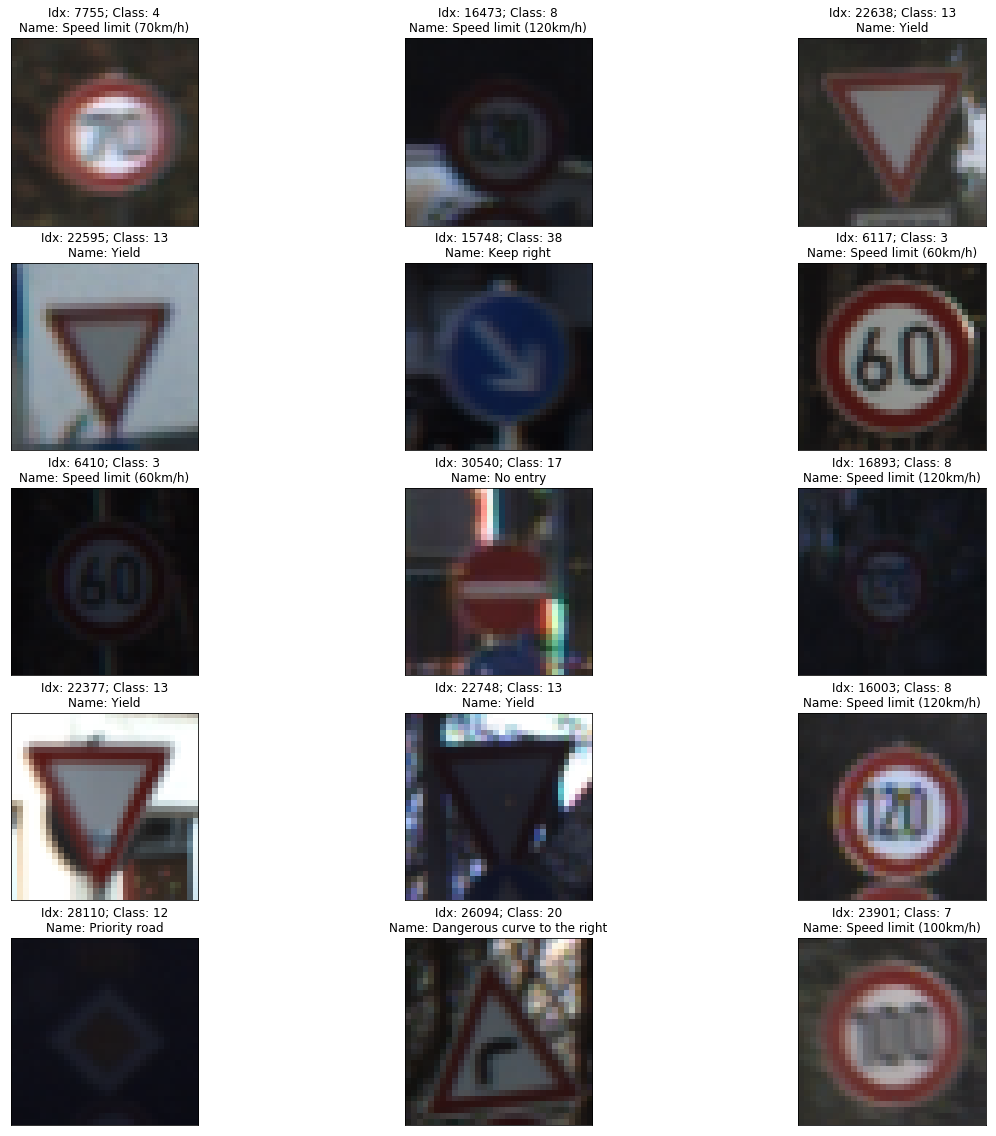

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# Now plot some images and take a look
def get_rand_image():
    """Get a random image from the training data.
    """
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    return image, index


def load_signnames():
    """Load the id to string name mapping into a dict.
    """
    id2names={}
    with open('signnames.csv') as f:
        d = f.readlines()
    for r in d[1:]:
        class_id, sign_name = r.strip().split(',')
        id2names[int(class_id)] = sign_name
    return id2names

def plot_rand_sample(id2names):
    """Plot some samples for visual inspection. Running this cell multiple times will 
    produce different random samples from the training data."""
    fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20,20))
    for ax in np.array(axes).flatten():
        image, index = get_rand_image()
        class_id = y_train[index]
        ax.set_title('Idx: %d; Class: %d\nName: %s' % (index, class_id, id2names[class_id]))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        s = fig.add_subplot(ax)
        s.imshow(image)
    plt.show()

id2names = load_signnames()
plot_rand_sample(id2names)

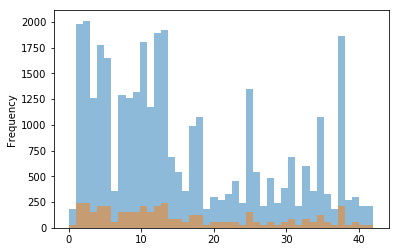

In [4]:
def plot_hist_summary(y_train, y_valid, y_test):
    """Plot a histogram of the training, validation and test sets.
    """
    train_classes = pd.Series(y_train)
    train_classes.plot.hist(alpha=0.5, bins=43)
    
    train_classes = pd.Series(y_valid)
    train_classes.plot.hist(alpha=0.5, bins=43)

plot_hist_summary(y_train, y_valid, y_test)

# Remarks & Observations

* The classes are distributed in equal proportions in the training, validation and test sets

* The most common classes are approx. 10 times more populous than the least common. This will make it difficult for the model to train on the least common images.

* All the categories are valid and none are blank/NaN, which is good (no need to preprocess to cover missing data)

* Some images are very dark (i.e. the pictures were taken in very low light) therefore there is a broad range in the brightness. This is a good motivation for applying grayscale. For example, images 11830, 18473, 15141 and 17847.

* The images are also quite low resolution and some of them are very hard to intrepret for a human. Examples: 24452, 13415. For those two images, they look like speed limit signs, but the numbers are impossible to read. This low resolution would probably need to be replicated in any new images that we want to pass through the model, otherwise the model may not produce a good prediction.

* According to http://benchmark.ini.rub.de, the images contain a border of at least 10% of the image size, "at least 5 pixels". Additionally, "images are not necessarily squared... the actual raffic sign is not necessarily centered within the image... this is true for images that were close to the image border in the full camera image"


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Original Image:


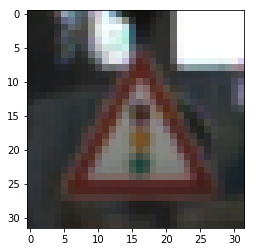

Normalized Grayscale Image:


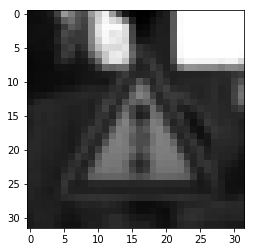

In [5]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

def rgb2gray(image_set):
    x = np.array([cv2.cvtColor(i, cv2.COLOR_RGB2GRAY) for i in image_set]).reshape([-1, 32, 32, 1]) 
    return x

def normalize(image_set):
    x = image_set.copy().astype(np.float64)
    x = (x - 128) / 128
    return x

def preprocess(image_set):
    x = rgb2gray(image_set)
    x = normalize(x)
    return x

# Reload the data to ensure a clean start
X_train, y_train, X_valid, y_valid, X_test, y_test = load_data()

print("Original Image:")
plt.imshow(X_train[1243].squeeze())
plt.show()

# Now re-process all the images
X_train = preprocess(X_train)
X_valid = preprocess(X_valid)
X_test = preprocess(X_test)

print("Normalized Grayscale Image:")
plt.imshow(X_train[1243].squeeze(), cmap="gray")
plt.show()

### Model Architecture

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

def LeNet(x, keep_prob):
    """Implement LeNet for image recognition
    """
    # Convolutional Layer. 32x32x1 --> 30x30x6 --> 15x15x6
    logits = tf.nn.conv2d(x, w1, strides=[1, 1, 1, 1], padding='VALID') + b1
    logits = tf.nn.elu(logits)
    logits = tf.nn.max_pool(logits, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Convolutional Layer: 15x15x6 --> 13x13x16 --> 6x6x16
    logits = tf.nn.conv2d(logits, w2, strides=[1, 1, 1, 1], padding='VALID') + b2
    logits = tf.nn.elu(logits)
    logits = tf.nn.max_pool(logits, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Convolutional Layer: 6x6x16 --> 6x6x32
    logits = tf.nn.conv2d(logits, w3, strides=[1, 1, 1, 1], padding='VALID') + b3
    logits = tf.nn.elu(logits)
    
    # Flatten. 6x6x32 --> 1152
    logits = tf.contrib.layers.flatten(logits)

    # Fully Connected Layer. 1152 --> 120
    logits = tf.matmul(logits, w4) + b4
    logits = tf.nn.dropout(logits, keep_prob=keep_prob)
    logits = tf.nn.elu(logits)

    # Fully Connected Layer. 120 --> 84 
    logits = tf.matmul(logits, w5) + b5
    logits = tf.nn.dropout(logits, keep_prob=keep_prob)
    logits = tf.nn.elu(logits)

    # Fully Connected Layer. 84 --> 43
    logits = tf.matmul(logits, w6, name='logits') + b6
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [14]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

def evaluate(X_data, y_data, accuracy_operation):
    """Evaluate the accuracy of X_data wrt y_data
    """
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


def init_weights():
    """Initialize weights and biases
    """
    global w1, w2, w3, w4, w5, w6, b1, b2, b3, b4, b5, b6
    mu = 0
    sigma = 0.1
    w1 = tf.Variable(tf.truncated_normal([3, 3, 1, 6], mean = mu, stddev = sigma))
    b1 = tf.Variable(tf.zeros([6]))

    w2 = tf.Variable(tf.truncated_normal([3, 3, 6, 16], mean = mu, stddev = sigma))
    b2 = tf.Variable(tf.zeros([16]))

    w3 = tf.Variable(tf.truncated_normal([1, 1, 16, 32], mean = mu, stddev = sigma))
    b3 = tf.Variable(tf.zeros([32]))

    w4 = tf.Variable(tf.truncated_normal([6*6*32, 120], mean = mu, stddev = sigma))
    b4 = tf.Variable(tf.zeros([120]))

    w5 = tf.Variable(tf.truncated_normal([120, 84], mean = mu, stddev = sigma))
    b5 = tf.Variable(tf.zeros([84]))

    w6 = tf.Variable(tf.truncated_normal([84, 43], mean = mu, stddev = sigma))
    b6 = tf.Variable(tf.zeros([43]))

## Train the Model
# Run the training data through the training pipeline to train the model.

# Before each epoch, shuffle the training set.

# After each epoch, measure the loss and accuracy of the validation set.

# Save the model after training.
    
def train():
    """Main method - run the training including back prop and print out of results
    """
    global x, y, keep_prob, \
        X_train, y_train, X_valid, y_valid, X_test, y_test, \
        w1, w2, w3, w4, w5, w6, b1, b2, b3, b4, b5, b6, \
        logits, accuracy_operation, train_history, valid_history, \
        test_accuracy

    # Load the raw traffic sign data
    X_train, y_train, X_valid, y_valid, X_test, y_test = load_data()
    train_classes = pd.Series(y_train)
    valid_classes = pd.Series(y_valid)
    test_classes = pd.Series(y_test)

    # Save some images to be used later to manually check inference accuracy
    #save_random_sample()       
    
    # Pre-process the images
    X_train = preprocess(X_train)
    X_valid = preprocess(X_valid)
    X_test = preprocess(X_test)

    # x and y placeholders
    x = tf.placeholder(tf.float32, (None, 32, 32, 1), name="x")
    y = tf.placeholder(tf.int32, (None), name="y")
    keep_prob = tf.placeholder(tf.float32, name='keep_prob')

    #
    # Tensorflow operations
    #
    ## Initialize weights operation
    init_weights()
    ## One hot vector for y. Note: 43 is the number of classes in the data.
    one_hot_y = tf.one_hot(y, 43, name='one_hot_y')
    ## Forward prop
    logits = LeNet(x, keep_prob=keep_prob)
    ## Error
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
    ## Loss & Optimizer
    loss_operation = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate=RATE)
    ## Back prop
    training_operation = optimizer.minimize(loss_operation)
    ## Evaluate
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1), name='correct_op')
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name='accuracy_op')
    #
    
    # Run the training
    saver = tf.train.Saver()
    with tf.Session() as sess:
        print()
        print("Training...")
        print()

        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)
        epoch_number, train_history, valid_history = 0, [], []

        print("  Epoch# | Train | Valid")
        print("---------+-------+--------")

        for i in range(EPOCHS):
            epoch_number += 1
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: KEEP_PROB})
                
            train_accuracy = evaluate(X_train, y_train, accuracy_operation)
            valid_accuracy = evaluate(X_valid, y_valid, accuracy_operation)
            
            # Only to be checked once model design is finalized
            test_accuracy = evaluate(X_test, y_test, accuracy_operation)
            
            train_history.append(train_accuracy)
            valid_history.append(valid_accuracy)
            
            print("  {:>6} | {:<.3f} | {:<.3f} ".format(i+1, train_accuracy, valid_accuracy))
        
        if not os.path.exists('./saved_models'):
            os.makedir('./saved_models')
        saver.save(sess, './saved_models/lenet')
        print("Model saved")
        print()
        

EPOCHS = 100
BATCH_SIZE = 1024
RATE = 0.0025
KEEP_PROB = 0.5

train()



Training...

  Epoch# | Train | Valid
---------+-------+--------
       1 | 0.413 | 0.330 
       2 | 0.719 | 0.655 
       3 | 0.843 | 0.781 
       4 | 0.905 | 0.826 
       5 | 0.926 | 0.853 
       6 | 0.943 | 0.872 
       7 | 0.953 | 0.892 
       8 | 0.960 | 0.893 
       9 | 0.967 | 0.911 
      10 | 0.972 | 0.913 
      11 | 0.977 | 0.927 
      12 | 0.977 | 0.929 
      13 | 0.981 | 0.927 
      14 | 0.983 | 0.932 
      15 | 0.985 | 0.935 
      16 | 0.984 | 0.938 
      17 | 0.985 | 0.931 
      18 | 0.988 | 0.940 
      19 | 0.990 | 0.944 
      20 | 0.991 | 0.949 
      21 | 0.991 | 0.945 
      22 | 0.992 | 0.947 
      23 | 0.992 | 0.937 
      24 | 0.992 | 0.946 
      25 | 0.992 | 0.941 
      26 | 0.993 | 0.945 
      27 | 0.993 | 0.947 
      28 | 0.994 | 0.947 
      29 | 0.994 | 0.949 
      30 | 0.995 | 0.946 
      31 | 0.995 | 0.954 
      32 | 0.995 | 0.951 
      33 | 0.995 | 0.954 
      34 | 0.995 | 0.951 
      35 | 0.994 | 0.952 
      36 | 0.996 | 0.952

### Plot the training vs validation accuracy over time

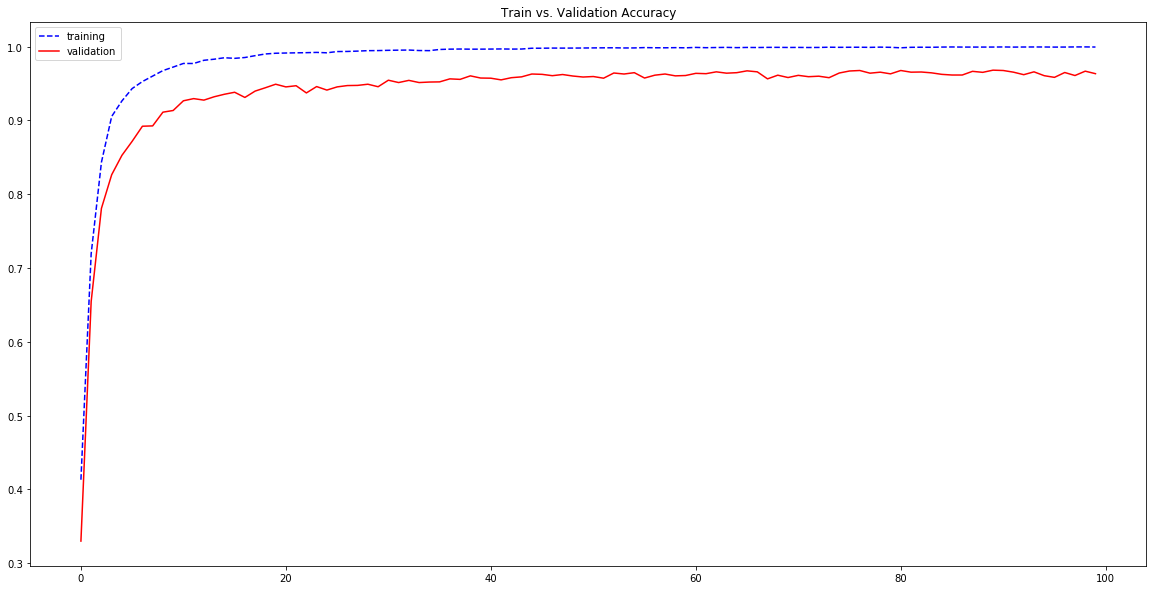

In [15]:
def plot_accuracy_hist():
    """ Plot the training vs validation accuracy over time
    """
    plt.figure(figsize=(20,10))
    plt.title('Train vs. Validation Accuracy')
    ax = plt.subplot(111)
    _ = ax.plot(train_history, '--', color='blue', label='training')
    _ = ax.plot(valid_history, color='red', label='validation')
    _ = ax.legend()

plot_accuracy_hist()

## Print Final Test Accuracy

In [16]:
print("Final test accuracy: {:.2f}".format(test_accuracy))

Final test accuracy: 0.95


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

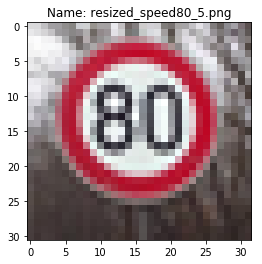

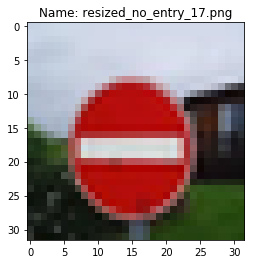

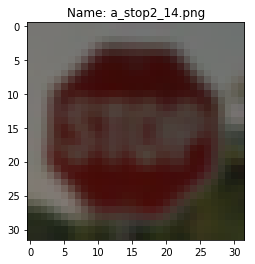

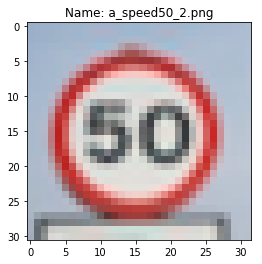

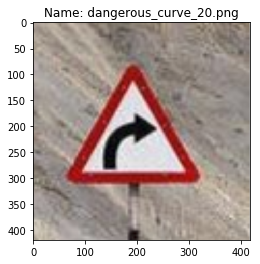

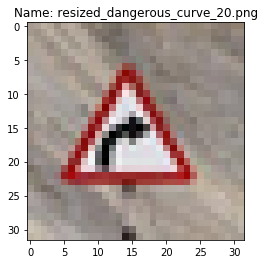

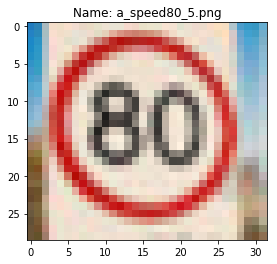

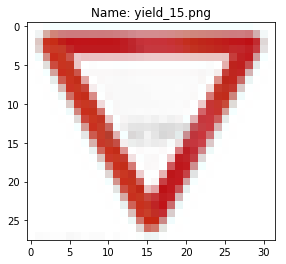

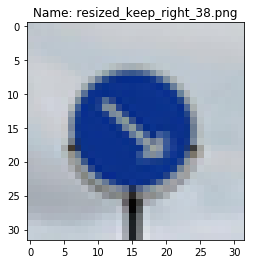

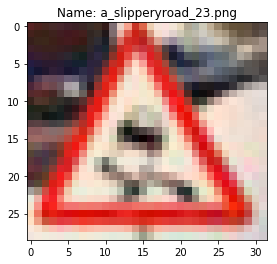

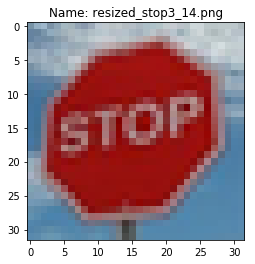

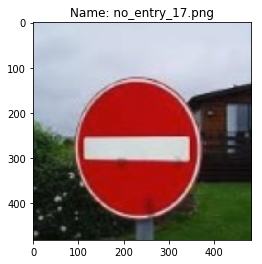

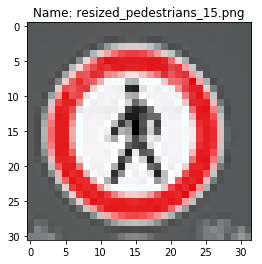

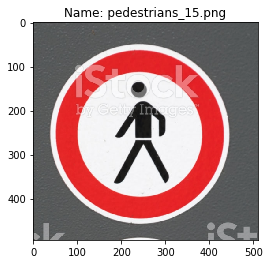

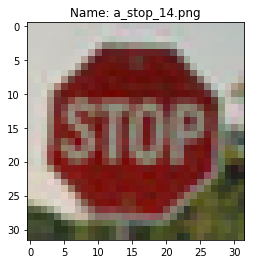

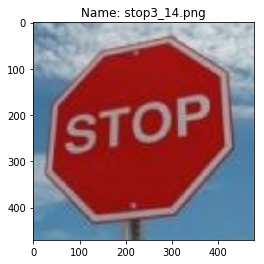

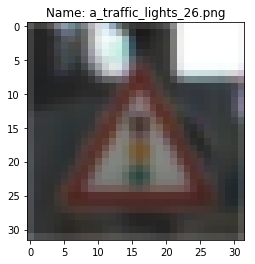

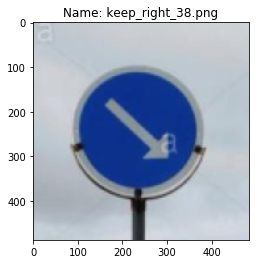

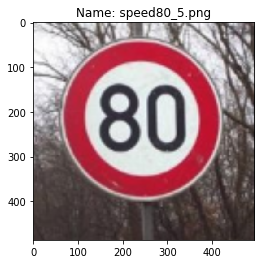

In [1]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import glob
import pickle
import random
import numpy as np
import argparse

import cv2
import pandas as pd
from sklearn.utils import shuffle
from scipy.ndimage import imread
from scipy.misc import imresize, imsave
import matplotlib.pyplot as plt

import tensorflow as tf

#
# Methods to load and preprocess images are defined here but not really used until the next cell
#
def preprocess_test_image(path, imtype='png', prt_fcn=None):
    image = imread(path)
    image = imresize(image, (32, 32, 3))
    if imtype == 'png':
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    image = cv2.GaussianBlur(image,(15,15),0)
    
    image = image.reshape((32, 32, 1))
    image = (image - 128) / 128
    return image


def get_images(glob_pattern=None, preprocess=True):
    if glob_pattern is None:
        glob_pattern = './data/other_images/*.png'

    images = []
    names = []
    for longname in glob.glob(glob_pattern):
        if preprocess:
            image = preprocess_test_image(longname)
        else:
            image = imread(longname)
        fname = os.path.basename(longname)
        images.append(image)
        names.append(fname)
    images = np.array(images)

    return images, names


def plot_images(preprocess=False):
    images, file_names = get_images(preprocess=preprocess)
    for i in range(len(images)):
        plt.imshow(images[i].squeeze(), cmap="gray")
        plt.title('Name: %s' % file_names[i])
        plt.show()

plot_images(preprocess=False)


### Predict the Sign Type for Each Image

In [2]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

def load_signnames():
    """Load the id to string name mapping into a dict.
    """
    id2names={}
    with open('signnames.csv') as f:
        d = f.readlines()
    for r in d[1:]:
        class_id, sign_name = r.strip().split(',')
        id2names[int(class_id)] = sign_name
    return id2names

def infer(glob_pattern=None):
    # Load the images
    images, file_names = get_images(glob_pattern)

    # The correct class for each image is encoded in the filename
    y = []
    for fname in file_names:
        y.append(fname.split('.')[-2].split('_')[-1])
    y = np.array(y)
        
    with tf.Session() as sess:
        saver = tf.train.import_meta_graph('./saved_models/lenet.meta')
        saver.restore(sess, tf.train.latest_checkpoint('./saved_models/'))

        # access tensors by name
        x = tf.get_default_graph().get_tensor_by_name("x:0")
        keep_prob = tf.get_default_graph().get_tensor_by_name("keep_prob:0")
        logits = tf.get_default_graph().get_tensor_by_name("logits:0")
        one_hot_y = tf.get_default_graph().get_tensor_by_name("one_hot_y:0")
        correct_prediction_op = tf.get_default_graph().get_tensor_by_name("correct_op:0")
        accuracy_operation_op = tf.get_default_graph().get_tensor_by_name("accuracy_op:0")

        # run the graph
        scores = sess.run(logits, feed_dict = {x: images, keep_prob: 1.0})
        
        # Check the accuracy
        x = sess.run(tf.one_hot(np.argmax(scores, axis=1), 43))
        y = sess.run(tf.one_hot(y, 43))

        correctness = sess.run(correct_prediction_op, feed_dict={logits: x, one_hot_y: y})
        accuracy = sess.run(accuracy_operation_op, feed_dict={correct_prediction_op: correctness})

    return file_names, accuracy, scores


id2names = load_signnames()
files, accuracy, scores = infer()

for i in range(len(files)):
    print("File: {:<31}: Actual: {:>2} --> Predicted: {} ({})".format(
        files[i], files[i].split('.')[-2].split('_')[-1], np.argmax(scores[i]), id2names[np.argmax(scores[i])]))


File: resized_speed80_5.png          : Actual:  5 --> Predicted: 16 (Vehicles over 3.5 metric tons prohibited)
File: resized_no_entry_17.png        : Actual: 17 --> Predicted: 34 (Turn left ahead)
File: a_stop2_14.png                 : Actual: 14 --> Predicted: 34 (Turn left ahead)
File: a_speed50_2.png                : Actual:  2 --> Predicted: 34 (Turn left ahead)
File: dangerous_curve_20.png         : Actual: 20 --> Predicted: 20 (Dangerous curve to the right)
File: resized_dangerous_curve_20.png : Actual: 20 --> Predicted: 20 (Dangerous curve to the right)
File: a_speed80_5.png                : Actual:  5 --> Predicted: 14 (Stop)
File: yield_15.png                   : Actual: 15 --> Predicted: 34 (Turn left ahead)
File: resized_keep_right_38.png      : Actual: 38 --> Predicted: 34 (Turn left ahead)
File: a_slipperyroad_23.png          : Actual: 23 --> Predicted: 0 (Speed limit (20km/h))
File: resized_stop3_14.png           : Actual: 14 --> Predicted: 35 (Ahead only)
File: no_entry_

### Analyze Performance

In [4]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

print("Accuracy for the newly downloaded images:          %s" % str(int(accuracy * 100)) + '%')

Accuracy for the newly downloaded images:          15%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 


In [5]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found 
### on the web. Feel free to use as many code cells as needed.

print()

with tf.Session() as sess:
    topk = sess.run(tf.nn.top_k(tf.nn.softmax(scores), k=5))

for i in range(len(files)):
    file = files[i]
    probs = topk.values[i]
    idxs = topk.indices[i]

    print("##### Top 5 Softmax for {}:".format(file))
    print()
    print("| {:<11} | {:<45} |".format("Probability", "Prediction"))
    print("|:{:11}-|:{:<40}-|".format("-"*11, "-"*45))

    for j in range(len(probs)):
        print("| {:11.4f} | {:<40} ({:2d}) |".format(probs[j], id2names[idxs[j]], idxs[j]))
    
    print("\n\n")
    


##### Top 5 Softmax for resized_speed80_5.png:

| Probability | Prediction                                    |
|:------------|:----------------------------------------------|
|      0.0274 | Vehicles over 3.5 metric tons prohibited (16) |
|      0.0270 | No vehicles                              (15) |
|      0.0265 | Right-of-way at the next intersection    (11) |
|      0.0262 | Priority road                            (12) |
|      0.0261 | Ahead only                               (35) |



##### Top 5 Softmax for resized_no_entry_17.png:

| Probability | Prediction                                    |
|:------------|:----------------------------------------------|
|      0.0287 | Turn left ahead                          (34) |
|      0.0283 | Ahead only                               (35) |
|      0.0266 | Speed limit (60km/h)                     ( 3) |
|      0.0265 | Vehicles over 3.5 metric tons prohibited (16) |
|      0.0264 | Bicycles crossing                        (29) |




### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")